In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
from scipy.stats.mstats import pearsonr, spearmanr

In [2]:
fol = '/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/genepromdelta.7/REAL_samples/deconprepare/corr/corr_Mn_nk/almmethodsum/CSx'

files = os.listdir(fol)

if '.ipynb_checkpoints' in files:
    files.remove('.ipynb_checkpoints')

if '.DS_Store' in files:
    files.remove('.DS_Store')

In [3]:
dfs = []

for i, file in enumerate(files):
    data = pd.read_csv(fol + '/' + file, sep='\t', index_col=0)
    df = pd.DataFrame(data)
    dfs.append(df.copy())
    if i == 0:
        samples = list(df.index)
        columns = list(df.columns)
    else:
        new_samples = list(df.index)
        new_columns = list(df.columns)
        samples = list(set(new_samples).intersection(samples))
        columns = list(set(new_columns + columns))
    columns = list(set(columns))

new_columns = []
for col in columns:
    if ('.y' not in col) and ('.x' not in col) and ('_real' not in col):
        new_columns.append(col)
        
columns = new_columns

In [4]:
columns=["Mn","NK"]  #["CD4","CD8","Tr","mB","nB","m4","Mn","NK"] #,"DC","Eo","mNeu"]

In [5]:
for i, df in enumerate(dfs):
    cols = []
    for cell in list(df.columns):
        if '.x' in cell:
            cols.append(cell.split('.')[0])
        elif '.y' in cell:
            cols.append(cell.split('.')[0] + '_real')
        else:
            cols.append(cell)
    df.columns = cols

In [6]:
 df.columns

Index(['CD4', 'CD8', 'nB', 'NK', 'Mn', 'mNeu', 'm8', 'DC', 'Eo', 'Tr', 'm4',
       'Mg', 'Er', 'mB', 'NK_real', 'Mn_real'],
      dtype='object')

In [7]:
#sys.exit(1)

In [8]:
def generate_df_dic(correlation, dfs):
    df_corr = {}
    for i, df in enumerate(dfs):
        df = df.loc[samples, :]
        for cell in columns:
            #print(columns)
            #sys.exit(1)
            if cell in df.columns:
                if cell not in df_corr:
                    df_corr[cell] = []
                corr = correlation(list(df[cell]), list(df[cell + '_real']))[0]
                df_corr[cell].append(corr)
            else:
                df_corr[cell].append(float('NaN'))
    return df_corr

In [9]:
df_pearson_dic = generate_df_dic(pearsonr, dfs)
df_spearman_dic = generate_df_dic(spearmanr, dfs)

In [10]:
df_pearson = pd.DataFrame.from_dict(df_pearson_dic, orient='index', columns = files)
df_spearman = pd.DataFrame.from_dict(df_spearman_dic, orient='index', columns = files)

df_pearson.to_csv(fol+'_pearson_correlation.txt', sep='\t')
df_spearman.to_csv(fol+'_spearman_correlation.txt', sep='\t')

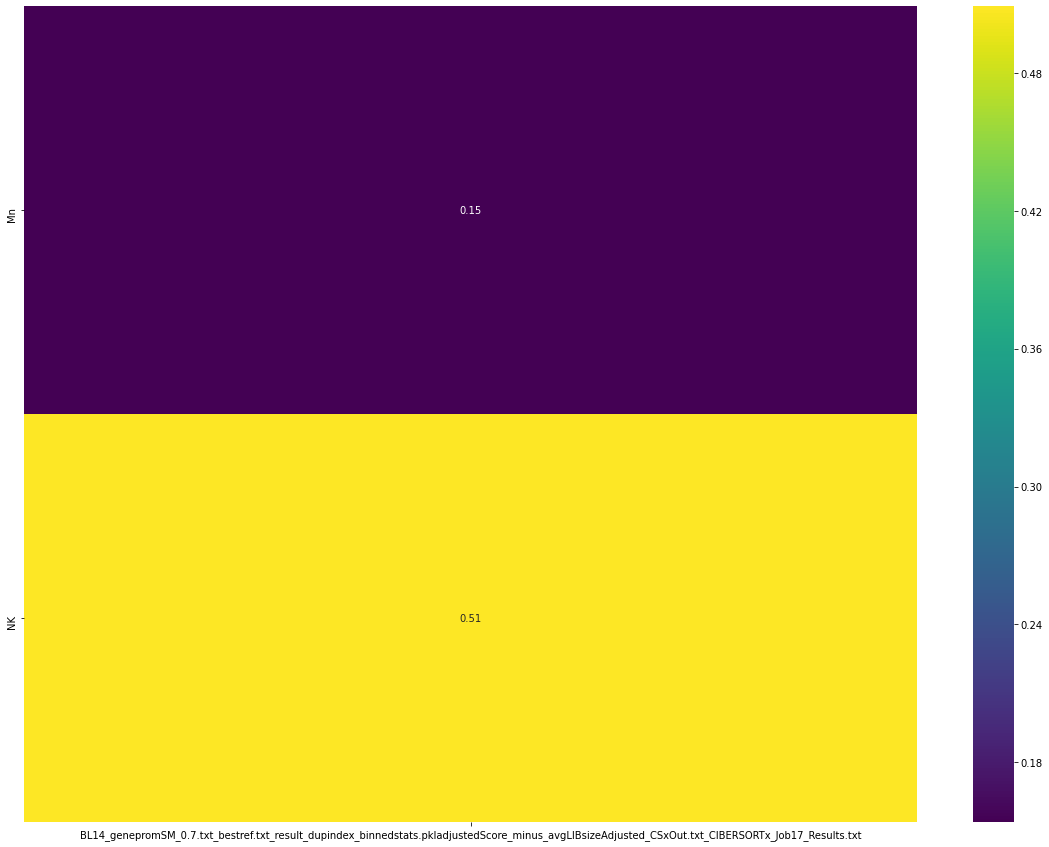

In [11]:
plt.figure(figsize=(20,15))

pearson_heatmap = sns.heatmap(df_pearson, cmap='viridis',annot=True)
pearson_heatmap.set_facecolor('gray')
plt.savefig(fol+'_pearson_heatmap.pdf', bbox_inches='tight')

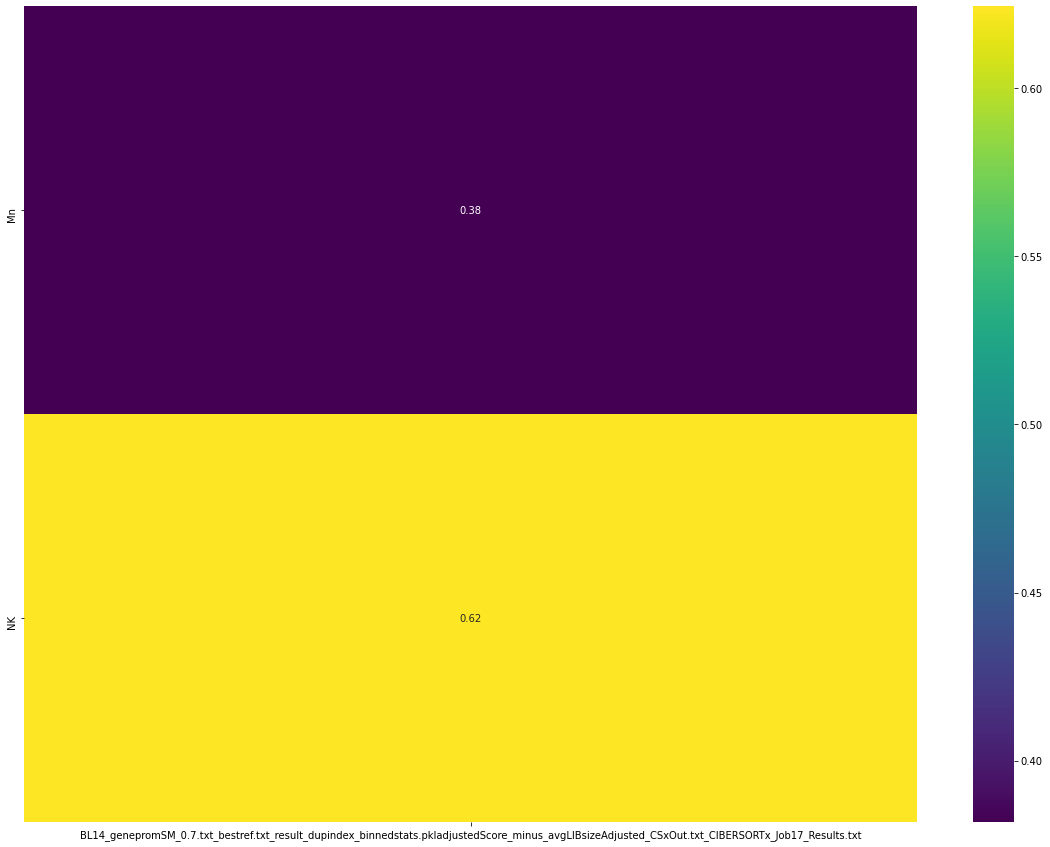

In [12]:
plt.figure(figsize=(20,15))

spearman_heatmap = sns.heatmap(df_spearman,cmap='viridis',annot=True)
spearman_heatmap.set_facecolor('gray')
plt.savefig(fol+'_spearman_heatmap.pdf', bbox_inches='tight')